✅ Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

✅ Descriptive Stats:
📌 Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
📌 Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
📌 Mode:
 Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object
📌 Standard Deviation:
 Transaction ID    288.819436
Age 

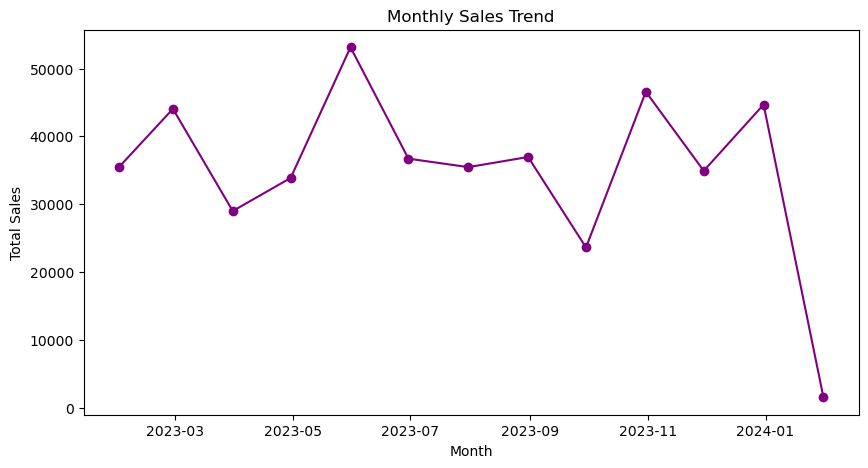

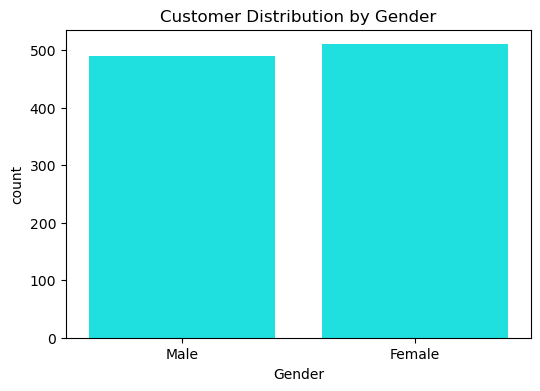

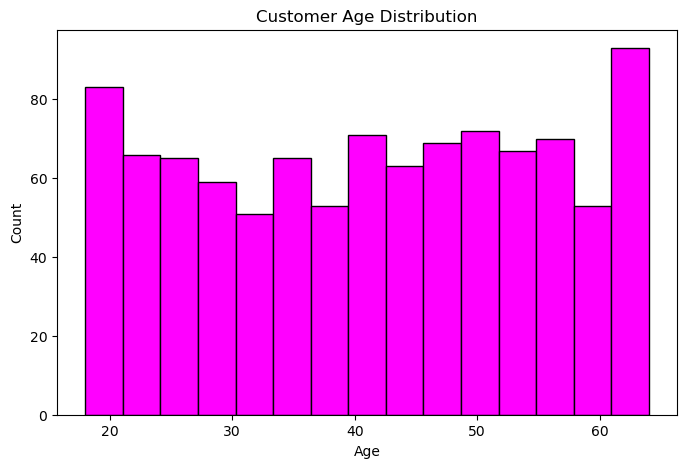

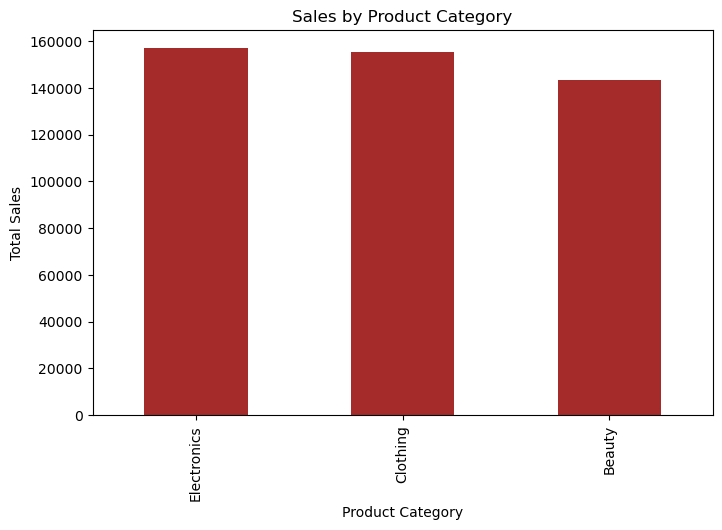

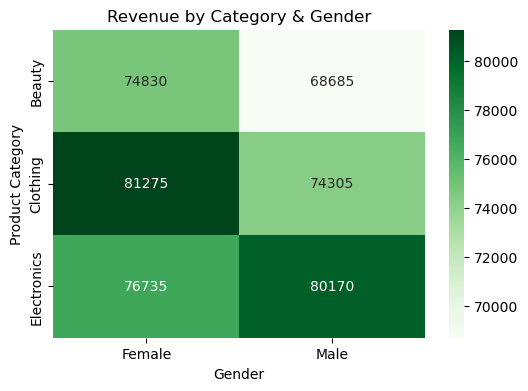


✅ --- Key Insights ---
1. Total sales during the period: 456000
2. Average order value: 456.00
3. Sales trend shows peak months and seasonality effects.
4. Gender distribution & age demographics reveal customer profile.
5. Top-selling categories can guide marketing and stock strategies.

✅ --- Recommendations ---
✔ Focus on top-performing product categories to boost revenue.
✔ Target marketing campaigns based on customer age groups.
✔ Leverage seasonal sales spikes with promotions.
✔ Monitor underperforming categories for optimization or replacement.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Data Zenix Solutions Internship/Task 1/Retail_ Sales_Dataset.csv")

# 1.Data Cleaning 
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values
print("✅ Missing Values:\n", df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# 2.Descriptive Statistics 
print("\n✅ Descriptive Stats:")
print("📌 Mean:\n", df.mean(numeric_only=True))
print("📌 Median:\n", df.median(numeric_only=True))
print("📌 Mode:\n", df.mode().iloc[0])
print("📌 Standard Deviation:\n", df.std(numeric_only=True))

# Total sales & average order value
total_sales = df['Total Amount'].sum()
avg_order_value = df['Total Amount'].mean()
print("\n✅ Total Sales:", total_sales)
print("📌 Average Order Value:", avg_order_value)

# 3.Time Series Analysis
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
monthly_sales = df.resample('ME')['Total Amount'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# 4.Customer Analysis & Product Analysis & Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, color='cyan')
plt.title("Customer Distribution by Gender")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=15, color='magenta', edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='brown')
plt.title("Sales by Product Category")
plt.ylabel("Total Sales")
plt.show()

# Quantity vs Revenue Heatmap
pivot = df.pivot_table(values='Total Amount', index='Product Category', columns='Gender', aggfunc='sum')
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Greens')
plt.title("Revenue by Category & Gender")
plt.show()

# 6.Insights & Recommendations
print("\n✅ --- Key Insights ---")
print(f"1. Total sales during the period: {total_sales}")
print(f"2. Average order value: {avg_order_value:.2f}")
print("3. Sales trend shows peak months and seasonality effects.")
print("4. Gender distribution & age demographics reveal customer profile.")
print("5. Top-selling categories can guide marketing and stock strategies.")

print("\n✅ --- Recommendations ---")
print("✔ Focus on top-performing product categories to boost revenue.")
print("✔ Target marketing campaigns based on customer age groups.")
print("✔ Leverage seasonal sales spikes with promotions.")
print("✔ Monitor underperforming categories for optimization or replacement.")


## Output